Questions:

???????????????????????????????????

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

dfd = pd.read_csv('data/full_data.csv', engine= 'python')
# df.head()

In [2]:
dfd["Status.simple"].unique()

array(['Dysplastic', 'Inflamed', 'Uninflamed'], dtype=object)

In [3]:
from pandas.api.types import is_numeric_dtype
col = ["Status.simple","ImageNumber","ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean","cx", "cy"]

dfd = dfd[col]
for c in dfd.columns[3:]:
    if not is_numeric_dtype(dfd[c]):
        dfd[c] = dfd[c].apply(lambda x: float(x.split()[0].replace(',','.')))

df = dfd[dfd["Status.simple"] == "Uninflamed"].drop("Status.simple", axis=1)

In [4]:
dfn = dfd.copy()
for c in dfn.columns[1:]:
    if is_numeric_dtype(dfn[c]):
        dfn[c] = (dfn[c]-dfn[c].mean())/dfn[c].std()
dfn

,Status.simple,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,...,Cleaved Caspase 3_Mean,ERK_Mean,TCRgd_Mean,pAKT_Mean,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean,cx,cy
0,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.826798,0.540902,1.024646,-1.210643,-0.543700,-0.749640,-1.111395,-1.120603,...,-0.183386,-0.919227,-0.808559,-0.821013,-1.086637,-1.149848,-0.260842,-0.391412,0.114260,-0.130533
1,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.826596,-1.125167,-0.889237,-1.208242,-0.508413,-0.810904,-0.929994,-1.126718,...,-0.692172,-1.367412,-1.033648,-1.244612,-1.102239,-1.146674,-0.187437,-0.385213,-0.193018,-0.125039
2,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.826393,-0.041219,-0.506461,-1.209043,-0.559370,-0.848500,-1.409939,-1.120446,...,-0.686932,-0.665757,-1.249614,-1.220950,-1.470420,-1.248664,-0.516775,-0.046645,-1.259409,-0.127013
3,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.826191,0.079220,-0.171531,-1.209696,-0.424720,-0.747432,-0.804960,-1.147415,...,-0.479002,-0.895506,-0.923272,-0.587807,-1.202877,-1.353725,-0.082581,-0.238798,-0.940437,-0.120786
4,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,-0.825989,-1.004728,-0.745696,-1.210844,-0.590978,-0.918089,-0.817997,-1.165338,...,-0.477881,-0.719344,-1.050722,-0.942766,-1.249118,-1.317626,0.197937,0.095186,-0.755973,-0.126576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394127,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.089529,2.467920,2.794989,-0.559059,-0.217180,0.036819,-0.593725,-0.771449,...,-0.465233,-0.326669,0.000495,-0.566618,-0.175955,-0.096422,-0.612088,-0.695517,-1.296664,-1.386981
394128,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.089731,-0.262023,-1.224167,-0.558555,0.507715,1.045121,-0.675103,-0.702888,...,0.337694,-1.157731,-1.117972,-0.831177,-0.981415,-0.518649,-0.976076,-0.721836,-1.180990,-1.385723
394129,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.089933,-1.345971,-0.841390,-0.558117,-0.590978,-0.952279,-1.110882,-0.931359,...,-0.548611,-1.757181,-0.948691,-1.191074,-0.606611,-0.900407,-0.858031,-1.218826,-1.472687,-1.389943
394130,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.090135,-0.924436,-1.080626,-0.555060,-0.512949,-0.509717,-0.993874,-0.675327,...,-0.690055,-1.102009,0.121897,-0.168513,-0.012292,0.150055,-0.397837,-0.171148,-1.285407,-1.401171


In [5]:
grouped = dfn.groupby('ImageNumber')
# grouped.count()

In [6]:
from sklearn_som.som import SOM
som = SOM(m=5, n=4, dim=56)
maxs = 0
keep = None
t = 20
for name, group in grouped:
    features = group._get_numeric_data().values
    if len(features) > maxs:
        maxs = len(features)
        if keep is not None:
            epoch = len(keep)*t
            som.fit(keep, epochs=epoch)
        keep = features
    else:
        epoch = len(features)*t
        som.fit(features, epochs=epoch)

In [7]:
df1n = keep.copy()
df1n = pd.DataFrame(df1n, columns=col[2:])
df2 = dfd[dfd['ImageNumber'] == '20210808_MBAA047_S8_R-2_D-S8_T42_R4']
# normalize df1
df2n = df2.copy()
for c in df2n.columns:
    if is_numeric_dtype(df2n[c]):
        df2n[c] = (df2n[c]-df2n[c].mean())/df2n[c].std()
df2n

,Status.simple,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,...,Cleaved Caspase 3_Mean,ERK_Mean,TCRgd_Mean,pAKT_Mean,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean,cx,cy
335423,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,-1.713281,-1.517041,-1.051606,-0.006166,2.358762,2.084148,0.036612,1.138103,...,-3.076351,-4.059037,-0.774424,-2.836185,-1.190848,-1.608589,-1.583077,-1.803014,-0.342339,1.703555
335424,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,-1.713172,-1.455225,-1.425634,0.686872,2.086091,1.501652,-2.930680,2.290266,...,-1.090880,-0.435407,-0.302359,-1.739068,-0.975437,-0.668875,-1.274598,-1.273376,-1.500813,1.699403
335425,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,-1.713062,-0.157084,-0.630825,1.223903,1.649568,1.615079,-0.031873,1.790880,...,-1.554557,-0.829781,-1.557710,-1.633379,-2.358112,-5.093266,0.970029,0.730495,1.599312,1.695452
335426,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,-1.712953,-0.867971,-1.051606,1.609240,-0.638755,-0.223222,0.098964,1.613715,...,-0.371741,-0.227861,0.061699,-0.823308,-0.201882,-0.106320,2.681232,2.912819,1.439306,1.693741
335427,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,-1.712843,0.059273,-0.256798,0.685842,1.252483,1.587796,0.439630,1.712206,...,1.180700,-1.060020,0.006796,-0.039161,-0.062164,0.284326,0.580161,1.048197,1.782264,1.692067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365384,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,1.720379,-0.991603,-1.285374,-0.870416,-0.427486,-0.461069,0.837751,-1.959049,...,-0.496639,-1.633958,3.003426,1.927469,1.826538,1.951886,-0.795600,-0.340181,-0.416109,-1.875303
365385,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,1.720488,-0.991603,-1.098360,-0.893155,-0.505882,-0.678349,0.345067,-1.365041,...,-1.167205,-2.521968,1.077788,-0.209604,0.381311,-0.349714,-1.044813,-1.162846,-0.386123,-1.875762
365386,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,1.720598,-0.497073,-0.303551,-0.775427,-0.540192,-0.716312,0.488925,-0.685465,...,-1.328762,-2.367093,1.241455,0.145007,1.109528,0.761704,-0.919587,-1.201851,-0.354803,-1.875618
365387,Inflamed,20210808_MBAA047_S8_R-2_D-S8_T42_R4,1.720708,-0.280717,-0.350305,-1.000489,-0.316810,-0.516983,0.819568,-0.222421,...,-1.884552,-3.053166,-0.245937,-2.108977,-0.967389,-0.956021,-0.882165,-0.802865,-0.064643,-1.876778


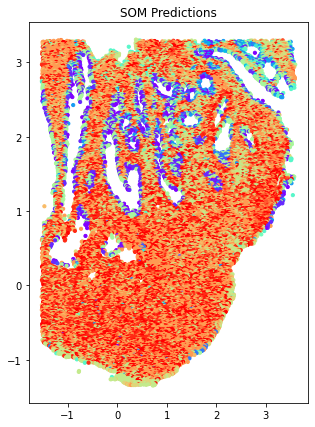

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df1n['cx']
y = df1n['cy']

ax.scatter(x, y, c=som.predict(df1n._get_numeric_data().values), cmap='rainbow', s=10)
ax.title.set_text('SOM Predictions')


plt.show()